In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
trdf=pd.read_pickle("traceroute_final.ta.pkl")
di=pd.read_csv('https://projectbismark.net:8080/bismark/status/wsj/f6d25a080a/tr/devinfo1.csv') #device information(di)

In [3]:
###############
##### All data necessary for answering the questions should be in the trdf (TraceRoute DataFrame) and di (device info)
##############
di_dict=di.set_index('sid').T.to_dict()
trdf.tail()

,City,DestHost,DestHostISP,DestHostLocation,DeviceISP,DeviceLocation,DeviceLocationY,Flows,Hops,ISP,...,NbrOfBigCDNs,NbrOfBigISPs,PercentOfUnresolvedCities,PercentOfUnresolvedISPs,RTTs,UniqueCities,UniqueCities_len,UniqueISPs,UniqueISPs_len,id
81563,"[Local:192.168.143.1, Local:192.168.1.1, Local...",52.5.61.180,Amazon.com,Ashburn,Verizon Fios,dc,Washington,[0efe0809e7461b3c7126774bd011c4ef-netflix.com],"[192.168.143.1, 192.168.1.1, 192.168.143.54, 1...","[Local:192.168.143.1, Local:192.168.1.1, Local...",...,0,4,38.709677,0.0,"[0.591037, 0.770048, 82.28014, 7.665479, 69.29...","[nan, Garland, Ashburn, Seattle]",4,"[Verizon Internet Services, ANS CO+RE Systems,...",4,test_1769
81564,"[Local:192.168.143.1, Local:192.168.1.1, Local...",52.4.166.237,Amazon.com,Ashburn,Verizon Fios,dc,Washington,"[45e9ba8459bef7e6a50b350af0b23308-netflix.com,...","[192.168.143.1, 192.168.1.1, 192.168.143.54, 1...","[Local:192.168.143.1, Local:192.168.1.1, Local...",...,0,4,41.935484,0.0,"[0.891056, 1.218076, 87.11445, 7.67048, 72.031...","[nan, Garland, Ashburn, Seattle]",4,"[Verizon Internet Services, ANS CO+RE Systems,...",4,test_1769
81565,"[Local:192.168.143.1, Local:192.168.1.1, Local...",52.21.45.48,Amazon.com,Ashburn,Verizon Fios,dc,Washington,"[85959e2a84162fa0e19e7a58f067001c-netflix.com,...","[192.168.143.1, 192.168.1.1, 192.168.143.54, 1...","[Local:192.168.143.1, Local:192.168.1.1, Local...",...,0,4,41.935484,0.0,"[1.550097, 1.217077, 0.284017, 7.661479, 65.02...","[nan, Garland, Ashburn, Seattle]",4,"[Verizon Internet Services, ANS CO+RE Systems,...",4,test_1769
81566,"[Local:192.168.143.1, Local:192.168.1.1, nan, ...",54.164.225.9,Amazon,Ashburn,Verizon Fios,dc,Washington,[fd3b526edc0803413659875e8044afb5-netflix.com],"[192.168.143.1, 192.168.1.1, 100.41.223.234, 1...","[Local:192.168.143.1, Local:192.168.1.1, Veriz...",...,0,4,67.741935,0.0,"[0.908057, 1.264079, 89.5276, 7.912495, 91.693...","[nan, Garland, Ashburn, Seattle]",4,"[Verizon Internet Services, ANS CO+RE Systems,...",4,test_1769
81567,"[Local:192.168.143.1, Local:192.168.1.1, nan, ...",8.8.8.8,Google,NaN,Verizon Fios,dc,Washington,[],"[192.168.143.1, 192.168.1.1, 100.41.223.234, 1...","[Local:192.168.143.1, Local:192.168.1.1, Veriz...",...,0,3,72.727273,0.0,"[0.763048, 1.174073, 4.368273, 3.912244, 94.44...","[nan, Pryor]",2,"[Verizon Internet Services, ANS CO+RE Systems,...",3,test_1769


In [4]:
di_dict

{'test_1521': {'Unnamed: 0': 0,
  'bid': 'PI001E063557EB',
  'city_x': 'nyc',
  'ip': '209.150.50.142',
  'country_x': 'US',
  'v': 612,
  'datels': '2019-05-12',
  'timels': '09:51:01',
  'status': 'down',
  'city_y': 'New York',
  'state': 'NY',
  'country_y': 'US',
  'lat': 40.7503,
  'long': -74.0014,
  'isp': 'RCN',
  'org': 'RCN',
  'domain': 'rcncustomer.com',
  'ASorg': 'RCN',
  'hits': nan},
 'test_9702': {'Unnamed: 0': 1,
  'bid': 'PIB827EB1413A0',
  'city_x': 'nyc',
  'ip': '173.68.99.182',
  'country_x': 'US',
  'v': 612,
  'datels': '2019-01-11',
  'timels': '01:43:08',
  'status': 'down',
  'city_y': 'New York',
  'state': 'NY',
  'country_y': 'US',
  'lat': 40.7503,
  'long': -74.0014,
  'isp': 'Verizon Fios',
  'org': 'Verizon Fios',
  'domain': 'verizon.net',
  'ASorg': 'MCI Communications Services Inc. d/b/a Verizon Business',
  'hits': nan},
 'test_5826': {'Unnamed: 0': 2,
  'bid': 'PI001E06355476',
  'city_x': 'dallas',
  'ip': '99.168.102.149',
  'country_x': 'US',

In [5]:
# All cities resolved by MaxMind
trdf_allresolved=trdf[trdf.PercentOfUnresolvedCities == 0.0]

In [6]:
#Numbers looks good, total of 4660 something...
trdf_allresolved.groupby(["id","DeviceLocationY", "Meta"]).size().sort_values(ascending=False)

id         DeviceLocationY  Meta          
test_4287  Park Ridge       Amazon            877
test_3515  Chicago          Amazon            793
test_7107  Brooklyn         Amazon            460
test_4287  Park Ridge       Cloudfront CDN    413
test_1521  New York         Netflix           385
test_7107  Brooklyn         Cloudfront CDN    287
test_9892  Brooklyn         Amazon            226
test_7107  Brooklyn         Netflix           170
test_9892  Brooklyn         Cloudfront CDN    161
test_3515  Chicago          Sling TV          114
                            Youtube           102
test_1521  New York         Amazon             79
test_8265  Brooklyn         Amazon             77
test_3515  Chicago          Netflix            67
test_9892  Brooklyn         Hulu               58
test_4287  Park Ridge       Youtube            45
test_8265  Brooklyn         Netflix            45
test_3515  Chicago          Cloudfront CDN     40
test_4287  Park Ridge       Netflix            32
test_71

In [7]:
#Not sure if I'd have to use the provided location or MaxMind resolved location
trdf_allresolved.groupby(["id","DeviceLocation", "Meta"]).size().sort_values(ascending=False)

id         DeviceLocation  Meta          
test_4287  chicago area    Amazon            877
test_3515  chicago area    Amazon            793
test_7107  westchester     Amazon            460
test_4287  chicago area    Cloudfront CDN    413
test_1521  nyc             Netflix           385
test_7107  westchester     Cloudfront CDN    287
test_9892  nyc             Amazon            226
test_7107  westchester     Netflix           170
test_9892  nyc             Cloudfront CDN    161
test_3515  chicago area    Sling TV          114
                           Youtube           102
test_1521  nyc             Amazon             79
test_8265  nyc             Amazon             77
test_3515  chicago area    Netflix            67
test_9892  nyc             Hulu               58
test_4287  chicago area    Youtube            45
test_8265  nyc             Netflix            45
test_3515  chicago area    Cloudfront CDN     40
test_4287  chicago area    Netflix            32
test_7107  westchester     

In [8]:
trdf_allresolved.head()

,City,DestHost,DestHostISP,DestHostLocation,DeviceISP,DeviceLocation,DeviceLocationY,Flows,Hops,ISP,...,NbrOfBigCDNs,NbrOfBigISPs,PercentOfUnresolvedCities,PercentOfUnresolvedISPs,RTTs,UniqueCities,UniqueCities_len,UniqueISPs,UniqueISPs_len,id
1357,"[Local:192.168.143.1, Local:192.168.1.1, Board...",35.165.115.174,Amazon.com,Boardman,Verizon Fios,jersey city,Jersey City,[917be4cd82985b20ca183e527049a4eb-hulu.com],"[192.168.143.1, 192.168.1.1, 35.165.115.174]","[Local:192.168.143.1, Local:192.168.1.1, Amazo...",...,0,1,0.0,0.0,"[0.443013, 1.224035, 67.74598]",[Boardman],1,[Amazon.com],1,test_1166
1470,"[Local:192.168.143.1, Local:192.168.1.1, Board...",35.166.8.40,Amazon.com,Boardman,Verizon Fios,jersey city,Jersey City,[78a4e3d666af3428d3bee63791513745-hulu.com],"[192.168.143.1, 192.168.1.1, 35.165.115.174, 1...","[Local:192.168.143.1, Local:192.168.1.1, Amazo...",...,0,2,0.0,0.0,"[0.905027, 1.236036, 71.673096, 3.296096, 71.7...","[Boardman, Piscataway, Seattle, Ashburn]",4,"[Amazon.com, ANS Communications]",2,test_1166
3389,"[Local:192.168.143.1, Local:192.168.143.1, Loc...",10.0.0.1,Unknown,Unknown,Comcast Cable,seattle,Seattle,"[6ba3c861e840b44412350c061aa607ed-amazon.com, ...","[192.168.143.1, 192.168.143.1, 192.168.143.1, ...","[Local:192.168.143.1, Local:192.168.143.1, Loc...",...,0,0,0.0,0.0,"[1.642046, 0.746021, 1.130032, 0.693019, 89.55...",[],0,[],0,test_5689
3390,"[Local:192.168.143.1, Local:192.168.143.1, Loc...",52.119.196.66,Amazon.com,Ashburn,Comcast Cable,seattle,Seattle,[f5d2e5de71b5519ce5756ade298ac6aa-amazon.com],"[192.168.143.1, 192.168.143.1, 192.168.143.1, ...","[Local:192.168.143.1, Local:192.168.143.1, Loc...",...,0,0,0.0,0.0,"[0.869024, 0.296008, 99.22681, 441.31348, 50.3...",[],0,[],0,test_5689
16552,"[Local:192.168.1.254, Los Angeles, Los Angeles...",23.55.37.113,Akamai Technologies,Rowland Heights,AT&T U-verse,los angeles,Los Angeles,[c63c5f2ff58b7a930d3f826e6a7e52ae-user-att-99-...,"[192.168.1.254, 76.216.240.1, 76.216.240.1, 19...","[Local:192.168.1.254, AT&T U-verse, AT&T U-ver...",...,3,1,0.0,0.0,"[1.038035, 11.624388, 5.771193, 4.894164, 1.83...","[Los Angeles, Rowland Heights]",2,"[AT&T U-verse, Akamai Technologies]",2,test_1549


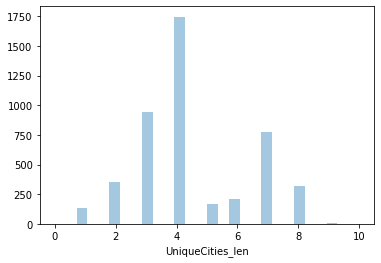

In [9]:
# A typical traceroute in all resolved have **4 cities** in the path
sns.distplot(trdf_allresolved.UniqueCities_len, kde=False)

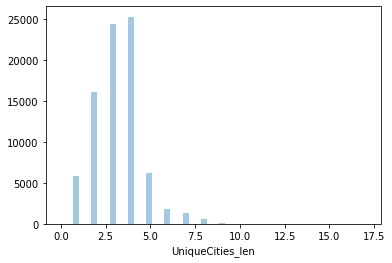

In [10]:
# A typical traceroute in all data have 3-4 cities in the path
sns.distplot(trdf.UniqueCities_len, kde=False);

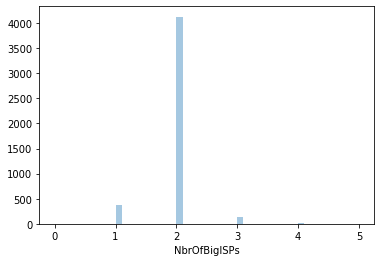

In [11]:
# NbrOfBigISPs > 2 are candidates for long/contigent routes?
sns.distplot(trdf_allresolved.NbrOfBigISPs, kde=False)

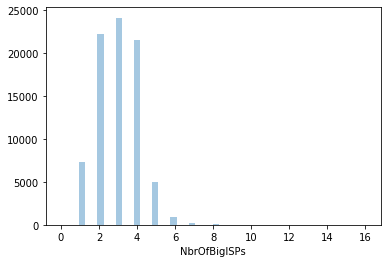

In [12]:
sns.distplot(trdf.NbrOfBigISPs, kde=False);

In [13]:
def printAnswers(id, nbrOfNetFlix, nbrOfNetFlixLong, nbrOfRegRoutes, nbrOfLongRoutes): #TODO Don't repeat yr self
    print("----------------------------------------")
    df_NetFlix=trdf_allresolved[(trdf_allresolved.id == id) &
                                (trdf_allresolved.Meta=='Netflix')].head(nbrOfNetFlix)
    for i,row in df_NetFlix.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to NetFlix")
        c = ""
        i = 0
        for city in row.City:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostLocation)+", "+str(row.DestHostISP))
        print("\n")
    df_NetFlixLong=trdf_allresolved[(trdf_allresolved.id == id) &
                                    (trdf_allresolved.Meta == 'Netflix') &
                                    (trdf_allresolved.NbrOfBigISPs > 2)].head(nbrOfNetFlixLong)
    for i,row in df_NetFlixLong.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to NetFlix Through Long List of ISPs")
        c = ""
        i = 0
        for city in row.City:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostLocation)+", "+str(row.DestHostISP))
        print("\n")
    df_RegRoutes=trdf_allresolved[(trdf_allresolved.id == id) &
                                  (trdf_allresolved.Meta != 'Netflix') &
                                  (trdf_allresolved.NbrOfBigISPs < 3)].head(nbrOfRegRoutes)
    for i,row in df_RegRoutes.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to Application")
        c = ""
        i = 0
        for city in row.City:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostLocation)+", "+str(row.DestHostISP))
        print("\n")
    df_LongRoutes=trdf_allresolved[(trdf_allresolved.id == id) &
                                  (trdf_allresolved.Meta != 'Netflix')&
                                  (trdf_allresolved.NbrOfBigISPs > 2)].head(nbrOfLongRoutes)
    for i,row in df_LongRoutes.iterrows():
        id=row.id
        print("ID: "+id)
        print("Application: "+row.Meta)
        print("Location and ISP: "+di_dict[id]['city_y']+","+di_dict[id]['state']+" / "+di_dict[id]['isp'])
        print("Type: Route to Application Through Long List of ISPs")
        c = ""
        i = 0
        for city in row.City:
            if c != city: #DO NOT REPEAT CITY: TODO avg?
                print("HOP"+str(i+1)+" City:"+city+", ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
                c=city
            #print("HOP"+str(i+1)+" City:"+city+" ISP:"+row.ISP[i]+", Latency:"+str(row.RTTs[i]))
            i+=1
        print("Destination: "+str(row.DestHostLocation)+", "+str(row.DestHostISP))
        print("\n")
for dev in list(di_dict.keys()):
    printAnswers(dev, 2, 2, 2 ,2)

#printAnswers("test_1521", 2, 2, 2 ,2) 
#printAnswers("test_4287", 2, 2, 2 ,2) 

----------------------------------------
ID: test_1521
Application: Netflix
Location and ISP: New York,NY / RCN
Type: Route to NetFlix
HOP1 City:Unresolved:10.49.32.1, ISP:Unresolved:10.49.32.1, Latency:11.292328
HOP3 City:Albrightsville, ISP:RCN, Latency:3.866112
HOP4 City:Ashburn, ISP:Amazon.com, Latency:2.025059
HOP10 City:Woodside, ISP:RCN, Latency:31.525915
HOP11 City:Ashburn, ISP:Amazon.com, Latency:13.153382
HOP12 City:Woodside, ISP:RCN, Latency:31.788923
HOP14 City:Seattle, ISP:Amazon.com, Latency:29.135845
HOP17 City:Woodside, ISP:RCN, Latency:200.54782
HOP18 City:Seattle, ISP:Amazon.com, Latency:54.626583
HOP19 City:Woodside, ISP:RCN, Latency:10.401302
Destination: Ashburn, Amazon.com


ID: test_1521
Application: Netflix
Location and ISP: New York,NY / RCN
Type: Route to NetFlix
HOP1 City:Unresolved:10.49.32.1, ISP:Unresolved:10.49.32.1, Latency:9.712282
HOP4 City:Woodside, ISP:RCN, Latency:5.891171
HOP5 City:Albrightsville, ISP:RCN, Latency:5.318155
HOP7 City:Ashburn, ISP:Am

----------------------------------------
ID: test_1549
Application: Netflix
Location and ISP: Los Angeles,CA / AT&T U-verse
Type: Route to NetFlix
HOP1 City:Local:192.168.1.254, ISP:Local:192.168.1.254, Latency:1.395046
HOP2 City:Local:192.168.143.160, ISP:Local:192.168.143.160, Latency:2.981099
HOP3 City:Local:192.168.143.186, ISP:Local:192.168.143.186, Latency:0.171006
HOP4 City:Local:192.168.143.188, ISP:Local:192.168.143.188, Latency:5.119171
HOP5 City:Los Angeles, ISP:AT&T U-verse, Latency:10.291343
HOP6 City:Anaheim, ISP:Beveridge & Diamond  P.C., Latency:23.583786
HOP7 City:Local:192.168.143.160, ISP:Local:192.168.143.160, Latency:4.094137
HOP8 City:Local:192.168.143.188, ISP:Local:192.168.143.188, Latency:2.919097
HOP9 City:Local:192.168.143.156, ISP:Local:192.168.143.156, Latency:2.876095
HOP10 City:Los Angeles, ISP:AT&T U-verse, Latency:16.405546
HOP11 City:Local:192.168.143.160, ISP:Local:192.168.143.160, Latency:46.092537
HOP12 City:Local:192.168.143.186, ISP:Local:192.168.

----------------------------------------
----------------------------------------
ID: test_4287
Application: Netflix
Location and ISP: Park Ridge,IL / WideOpenWest
Type: Route to NetFlix
HOP1 City:Local:192.168.0.1, ISP:Local:192.168.0.1, Latency:2.169818
HOP3 City:Park Ridge, ISP:WideOpenWest, Latency:12.483497
HOP4 City:Reynoldsburg, ISP:WideOpenWest, Latency:14.188998
HOP5 City:Park Ridge, ISP:WideOpenWest, Latency:8.73526
HOP6 City:Western Springs, ISP:WideOpenWest, Latency:16.174288
HOP7 City:Park Ridge, ISP:WideOpenWest, Latency:6.376539
Destination: Palos Park, WideOpenWest


ID: test_4287
Application: Netflix
Location and ISP: Park Ridge,IL / WideOpenWest
Type: Route to NetFlix
HOP1 City:Local:192.168.0.1, ISP:Local:192.168.0.1, Latency:2.542834
HOP3 City:Park Ridge, ISP:WideOpenWest, Latency:12.645839
HOP4 City:Reynoldsburg, ISP:WideOpenWest, Latency:4.705569
HOP5 City:Park Ridge, ISP:WideOpenWest, Latency:16.280016
HOP6 City:Western Springs, ISP:WideOpenWest, Latency:8.147508

ID: test_8265
Application: Cloudfront CDN
Location and ISP: Brooklyn,NY / Spectrum
Type: Route to Application Through Long List of ISPs
HOP1 City:New York, ISP:Spectrum, Latency:6.547131
HOP3 City:Englewood, ISP:Spectrum, Latency:11.57723
HOP4 City:Ashburn, ISP:Amazon.com, Latency:14.224283
HOP10 City:Seattle, ISP:Amazon CloudFront, Latency:37.279743
HOP11 City:Los Angeles, ISP:Cogent Communications, Latency:110.973206
HOP12 City:Seattle, ISP:Amazon CloudFront, Latency:21.525429
Destination: Seattle, Amazon CloudFront


ID: test_8265
Application: Amazon
Location and ISP: Brooklyn,NY / Spectrum
Type: Route to Application Through Long List of ISPs
HOP1 City:Canberra, ISP:Australian Academic and Research Network (AARNet), Latency:244.90793
HOP2 City:New York, ISP:Spectrum, Latency:4.188084
HOP5 City:Ashburn, ISP:Amazon.com, Latency:17.95236
HOP6 City:Canberra, ISP:Australian Academic and Research Network (AARNet), Latency:7.488151
HOP7 City:Ashburn, ISP:Amazon.com, Latency:19.165386
HOP10

----------------------------------------
----------------------------------------
----------------------------------------
ID: test_5689
Application: Amazon
Location and ISP: Seattle,WA / Comcast Cable
Type: Route to Application
HOP1 City:Local:192.168.143.1, ISP:Local:192.168.143.1, Latency:1.642046
HOP5 City:Local:192.168.143.106, ISP:Local:192.168.143.106, Latency:89.553535
HOP10 City:Local:192.168.143.1, ISP:Local:192.168.143.1, Latency:0.721021
HOP11 City:Local:192.168.143.106, ISP:Local:192.168.143.106, Latency:71.90303
HOP17 City:Local:192.168.143.1, ISP:Local:192.168.143.1, Latency:38.799095
HOP18 City:Local:192.168.143.106, ISP:Local:192.168.143.106, Latency:56.485596
HOP22 City:Local:192.168.143.1, ISP:Local:192.168.143.1, Latency:49.4864
HOP23 City:Local:192.168.143.106, ISP:Local:192.168.143.106, Latency:26.280745
HOP27 City:Local:192.168.143.124, ISP:Local:192.168.143.124, Latency:205.40181
HOP28 City:Local:192.168.143.1, ISP:Local:192.168.143.1, Latency:99.48382
HOP29 Cit

In [14]:
trdf[trdf.DestHost != '8.8.8.8'].groupby(['id', 'DestHost']).size().reset_index()[['id','DestHost']].tail()

,id,DestHost
17066,test_9892,8.252.31.116
17067,test_9892,8.253.154.219
17068,test_9892,8.253.154.48
17069,test_9892,8.253.217.252
17070,test_9892,99.84.240.40
